In [1]:
using Plots
using Interact
using Distributions
using LinearAlgebra
using Printf

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1260


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2956266352949801594\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10859635536759583024\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2956266352949801594\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
using Revise

In [3]:
using ScientificRT

┌ Info: Precompiling ScientificRT [5bc58e1e-5d7c-492b-bf1e-f34da4464f5b]
└ @ Base loading.jl:1260


In [4]:
θ_range = range(0, stop = π, length = 100)

0.0:0.03173325912716963:3.141592653589793

# Drawing a sample from Henyey-Greenstein
Assuming normalization, Henyey-Greenstein **is a** PDF. The formula that gives us the transformation from a continuous uniform RV $\xi$ between 0 and 1 to the HG distribution is given on p. 899 of PBRTv3

# Plotting Henyey-Greenstein as a function of $\mu=cos(\theta)$

In [5]:
p_mu = (μ, g) -> 1/(2)*(1 - g^2)/(1 + g^2 - 2*g*μ)^(3/2)

#3 (generic function with 1 method)

In [6]:
p_mu_flipped = (μ, g) -> 1/(2)*(1 - g^2)/(1 + g^2 + 2*g*μ)^(3/2) # using PBRT's convention

#5 (generic function with 1 method)

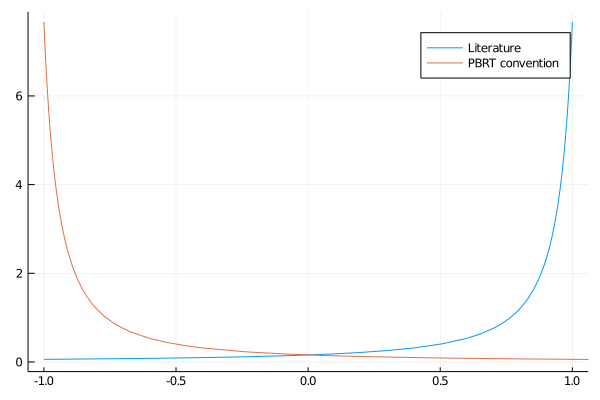

In [7]:
plot(μ -> p_mu(μ, 0.67), xlims=[-1,1], label="Literature")
plot!(μ -> p_mu_flipped(μ, 0.67), label="PBRT convention")

In [8]:
μ_range = -1:0.001:1

-1.0:0.001:1.0

In [9]:
p_mu_flipped67 = μ -> p_mu_flipped(μ, 0.67)

#11 (generic function with 1 method)

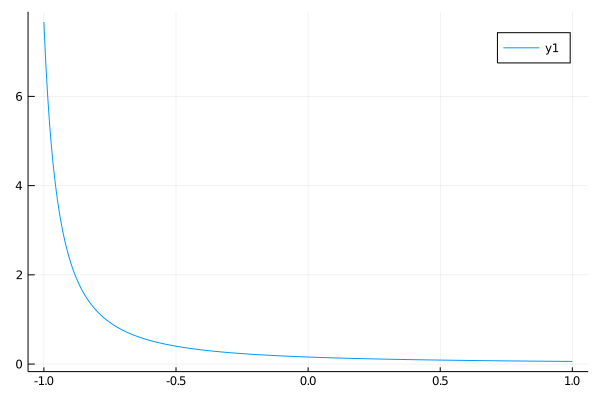

In [10]:
plot(μ_range, p_mu_flipped67.(μ_range))

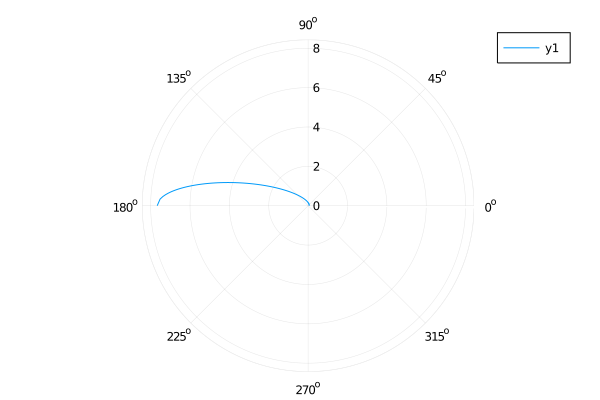

In [11]:
plot(acos.(μ_range), p_mu_flipped67.(μ_range), proj = :polar)

⚠️ Using `HG_sample_flipped` because PBRT assumes the incident direction points *away* from the scattering location, whereas the radiative transfer / scattering literature assumes that the incident direction points *towards* the scattering location.

In [12]:
num_samples = 100000

100000

In [13]:
uni = Uniform(0,1)

Uniform{Float64}(a=0.0, b=1.0)

In [14]:
hg_samples = [ScientificRT.HG_sample_flipped(rand(uni),0.67) for i in 1:num_samples];

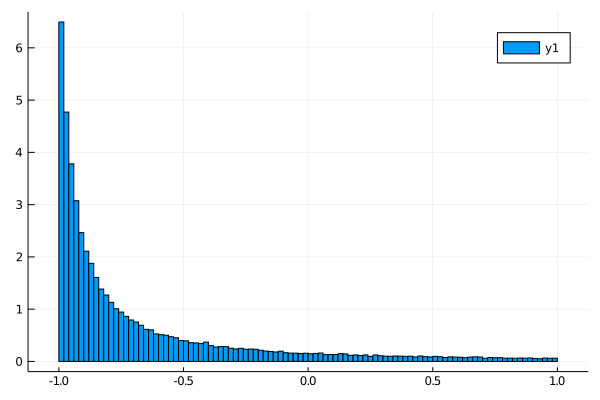

In [15]:
histogram(hg_samples, normed=true)

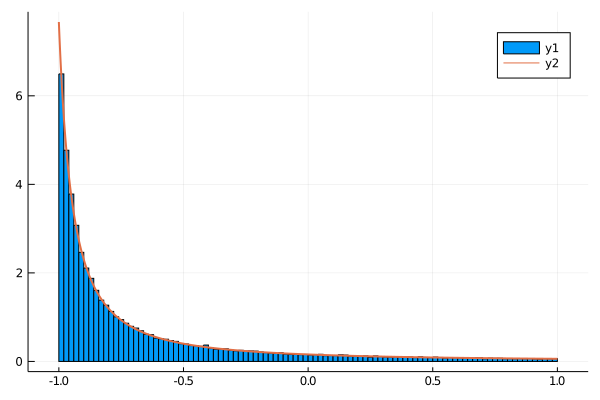

In [16]:
histogram(hg_samples, normed=true)
plot!(μ_range, p_mu_flipped67.(μ_range), linewidth = 2)

# Sampling directions using Henyey-Greenstein
This can be thought of as sampling points on the unit sphere according to the PDF defined by the Henyey-Greenstein phase function. This comes from p.899 / the `HenyeyGreenstein::Sample_p` function in PBRT

## Forward scattering ($g=0.67$)

In [37]:
test_sampler = ScientificRT.get_HG_direction_sampler(0.67)
outgoing_dir = normalize([1.0;1.0;1.0])
num_3d_samples = 1000
test_3d_samples = zeros(num_3d_samples,3)
outgoing_dir = normalize([1.0;1.0;1.0])
for i=1:num_3d_samples
    test_3d_samples[i,:] = test_sampler(outgoing_dir)'
end
plotlyjs()
scatter(test_3d_samples[:,1], 
        test_3d_samples[:,2], 
        test_3d_samples[:,3], 
        markersize = 1, 
        xlabel="x",
        ylabel="y",
        zlabel="z",
        xlims=[-1,1],
        ylims=[-1,1],
        zlims=[-1,1])

<!DOCTYPE html>
 
 
 Plots.jl

## Backscattering ($g=-0.35$)

In [38]:
test_sampler = ScientificRT.get_HG_direction_sampler(-0.35)
outgoing_dir = normalize([1.0;1.0;1.0])
num_3d_samples = 1000
test_3d_samples = zeros(num_3d_samples,3)
outgoing_dir = normalize([1.0;1.0;1.0])
for i=1:num_3d_samples
    test_3d_samples[i,:] = test_sampler(outgoing_dir)'
end
plotlyjs()
scatter(test_3d_samples[:,1], 
        test_3d_samples[:,2], 
        test_3d_samples[:,3], 
        markersize = 1, 
        xlabel="x",
        ylabel="y",
        zlabel="z",
        xlims=[-1,1],
        ylims=[-1,1],
        zlims=[-1,1])

<!DOCTYPE html>
 
 
 Plots.jl